In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X=dataset.iloc[:,[3,4]].values

In [24]:
from sklearn.cluster import  AffinityPropagation
from sklearn.datasets import make_blobs
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

SyntaxError: invalid syntax (4212697886.py, line 5)

In [8]:
from sklearn.cluster import AffinityPropagation

In [9]:
af = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, 
                         copy=True, preference=None, affinity='euclidean', verbose=False)
label=af.fit_predict(X)

In [10]:
#To add a extra column for cluster group
supervised=pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
supervised['Cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


In [19]:
supervised.to_csv("cluster.csv",index=False)
centroids=af.cluster_centers_
centroids

array([[ 25,   5],
       [ 28,  82],
       [ 28,  32],
       [ 46,  51],
       [ 60,  52],
       [ 67,  40],
       [ 77,  12],
       [ 78,  90],
       [ 78,  73],
       [103,  85],
       [103,  23]], dtype=int64)

In [20]:
supervised.columns[3]

'Annual Income (k$)'

In [21]:
supervised.columns[4]

'Spending Score (1-100)'

C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


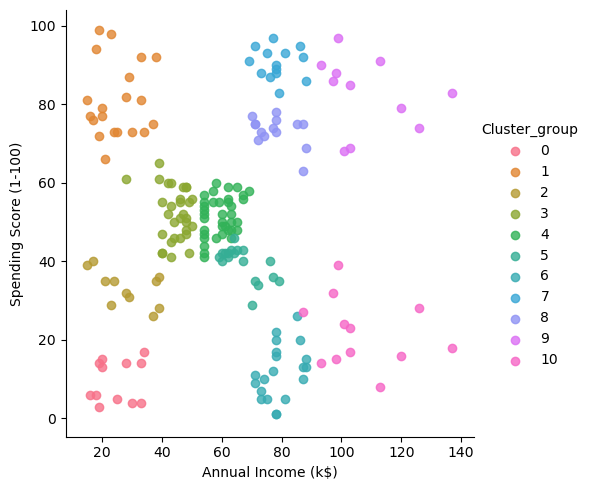

In [22]:
#seaborn for graphical use
import seaborn as sns
#sns.lmplot for graph,x axis is annual income ,y  axis is spending score ,hue is clustered column,fit_reg for fit_regression,legend for
#cluster colors and legend_out for cluster group name
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)